Saving Marketing.csv to Marketing.csv


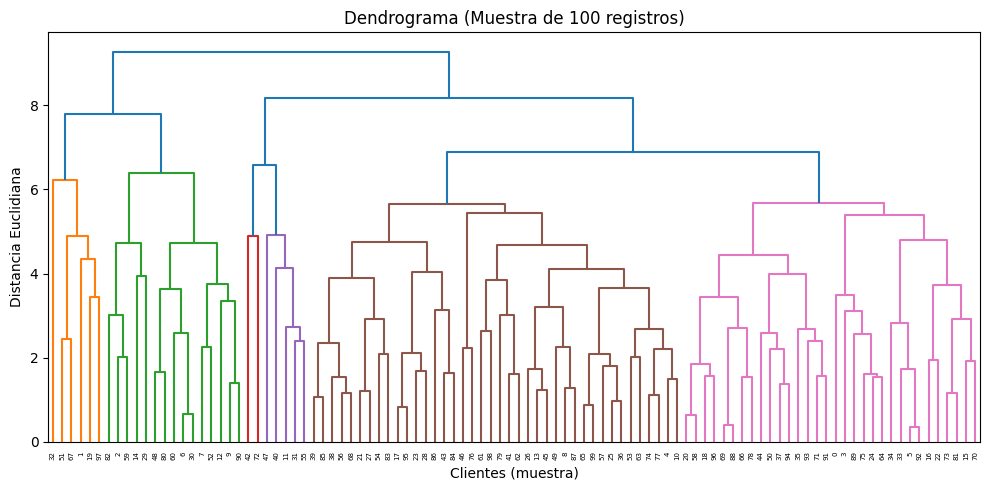

   ID  Cluster
0   1        3
1   2        3
2   3        3
3   4        3
4   5        3


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


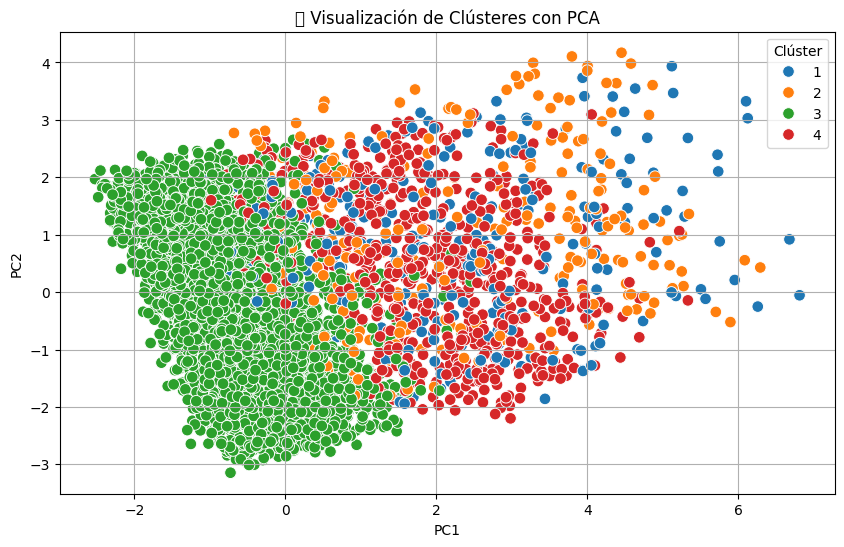

📊 Promedios de variables por clúster:


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Cluster,,,,,,,,,,,,
1,47.91,22.79,129.04,2.20,3.17,1.58,319.49,0.32,0.03,0.11,0.47,0.27
2,45.60,20.50,97.61,2.41,2.74,1.88,54.41,0.40,0.52,1.00,0.94,0.79
3,45.12,19.83,55.47,2.49,1.35,1.97,41.45,0.00,0.09,0.00,0.60,0.27
4,45.27,20.23,139.21,1.96,4.28,1.55,19.56,0.40,0.06,0.00,0.52,0.22



📘 Leyenda interpretativa sugerida:
Clúster 1: altos ingresos.
Clúster 2: altos ingresos, usan tarjeta de crédito, clientes digitales, usan CD Account.
Clúster 3: ingresos medios, clientes digitales.
Clúster 4: altos ingresos, clientes digitales.


In [ ]:
# ✅ CLUSTERING JERÁRQUICO COMPLETO EN GOOGLE COLAB

# Paso 1: Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from google.colab import files

# Paso 2: Subir archivo
uploaded = files.upload()

# Paso 3: Cargar dataset
df = pd.read_csv("Marketing.csv")

# Paso 4: Eliminar columnas no útiles
features = df.drop(columns=["ID", "ZIP Code"], errors='ignore')

# Paso 5: Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Paso 6: Crear dendrograma reducido con muestra de 100
sample = features.sample(n=100, random_state=42)
scaled_sample = scaler.fit_transform(sample)
linkage_sample = sch.linkage(scaled_sample, method='complete', metric='euclidean')

plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_sample)
plt.title("Dendrograma (Muestra de 100 registros)")
plt.xlabel("Clientes (muestra)")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()

# Paso 7: Clustering jerárquico para todos los datos
linkage_full = sch.linkage(scaled_features, method='complete', metric='euclidean')
clusters = fcluster(linkage_full, t=4, criterion='maxclust')  # Cambia t=4 si deseas otro número

df['Cluster'] = clusters
print(df[['ID', 'Cluster']].head())

# Paso 8: Visualización 2D con PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

df_viz = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_viz['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=70)
plt.title("🎯 Visualización de Clústeres con PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

# Paso 9: Tabla con promedios por clúster
print("📊 Promedios de variables por clúster:")
resumen = df.groupby('Cluster')[features.columns].mean().round(2)
display(resumen)

# Paso 10: Leyenda interpretativa (basada en estructura común)
print("\n📘 Leyenda interpretativa sugerida:")
for cluster_id, row in resumen.iterrows():
    descripcion = []
    if row['Income'] > 80:
        descripcion.append("altos ingresos")
    elif row['Income'] < 40:
        descripcion.append("ingresos bajos")
    else:
        descripcion.append("ingresos medios")

    if row['CreditCard'] > 0.5:
        descripcion.append("usan tarjeta de crédito")
    if row['Personal Loan'] > 0.5:
        descripcion.append("tienen préstamo personal")
    if row['Online'] > 0.5:
        descripcion.append("clientes digitales")
    if row['CD Account'] > 0.5:
        descripcion.append("usan CD Account")
    if row['Family'] >= 3:
        descripcion.append("familia grande")
    if row['Education'] == 3:
        descripcion.append("alta educación")

    print(f"Clúster {cluster_id}: {', '.join(descripcion)}.")
